In [67]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

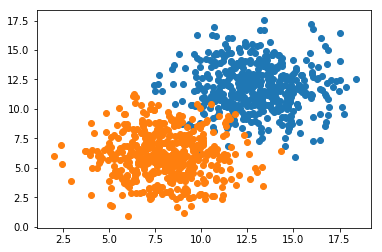

In [68]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [69]:
model = Sequential()
model.add(Dense(units = 1, input_shape =(2,), activation="sigmoid"))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs = 500, shuffle = 'true')

Epoch 1/500
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5608 - acc: 0.5460
Epoch 2/500
1000/1000 [==============================] - 0s 52us/step - loss: 0.6650 - acc: 0.6120
Epoch 3/500
1000/1000 [==============================] - 0s 64us/step - loss: 0.4454 - acc: 0.8600
Epoch 4/500
1000/1000 [==============================] - 0s 48us/step - loss: 0.3903 - acc: 0.8940
Epoch 5/500
1000/1000 [==============================] - 0s 52us/step - loss: 0.3472 - acc: 0.9040
Epoch 6/500
1000/1000 [==============================] - 0s 56us/step - loss: 0.3143 - acc: 0.9220
Epoch 7/500
1000/1000 [==============================] - 0s 56us/step - loss: 0.2949 - acc: 0.9320
Epoch 8/500
1000/1000 [==============================] - 0s 32us/step - loss: 0.2667 - acc: 0.9370
Epoch 9/500
1000/1000 [==============================] - 0s 36us/step - loss: 0.2400 - acc: 0.9570
Epoch 10/500
1000/1000 [==============================] - 0s 40us/step - loss: 0.2240 - acc: 0.9620
Epoch 11/5

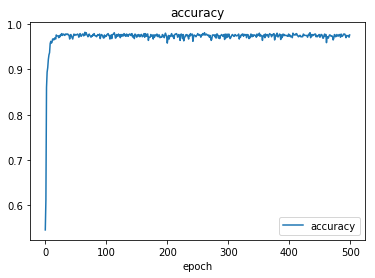

In [70]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

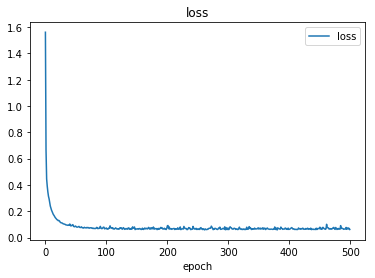

In [77]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [78]:
    def plot_decision_boundary(X, y, model):
        x_span = np.linspace(min(X[:, 0]) -1 , max(X[:, 0]) +1)
        y_span = np.linspace(min(X[:, 1]) -1 , max(X[:, 1]) +1)
        xx, yy = np.meshgrid(x_span, y_span)
        xx_, yy_ = xx.ravel(), yy.ravel()
        grid = np.c_[xx_, yy_]
        pred_func = model.predict(grid)
        z = pred_func.reshape(xx.shape)
        plt.contourf(xx, yy, z)

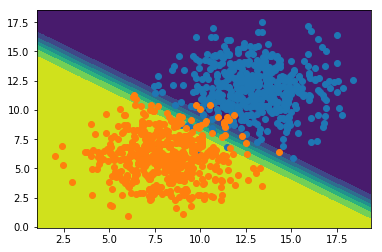

In [79]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

prediction is: [[0.9999856]]


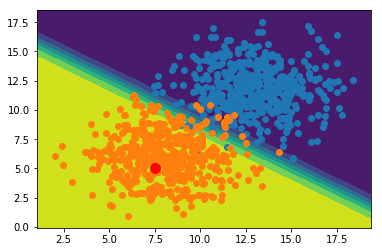

In [80]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = "o", markersize = 10, color="red")
print("prediction is:", prediction)